In [26]:
import pandas as pd
import numpy as np
import warnings

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score 

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

warnings.filterwarnings('ignore')

In [2]:
def run_model(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
    
    model.fit(X_train,y_train)
    predictions  = model.predict(X_test)
   
    print(classification_report(y_test, predictions))
    print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, predictions)))

    return

In [3]:
data = pd.read_csv("files_for_lab/Customer-Churn.csv")
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [4]:
data.shape

(7043, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [6]:
data["TotalCharges"] = data["TotalCharges"].apply(lambda x: np.nan if x == " " else x)
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"])
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
data = data.dropna()
data.shape

(7032, 16)

In [8]:
# X-y split
X = data.drop("Churn", axis=1)
y = data[["Churn"]]

In [9]:
y.value_counts()

Churn
No       5163
Yes      1869
dtype: int64

**Encode categoricals**

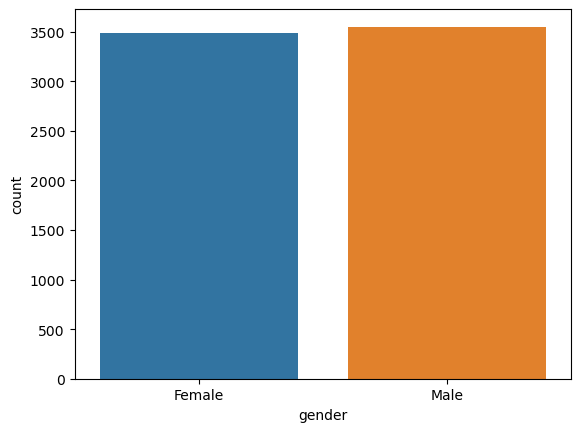

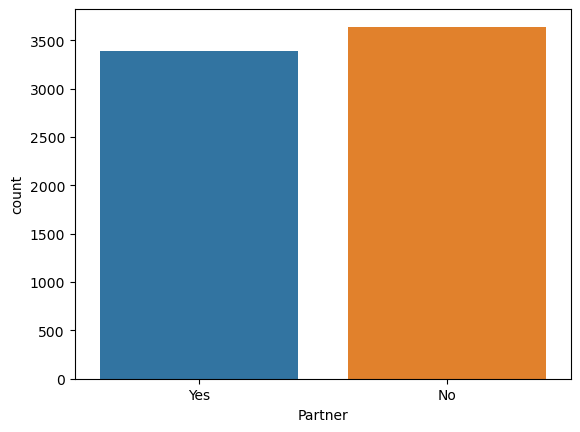

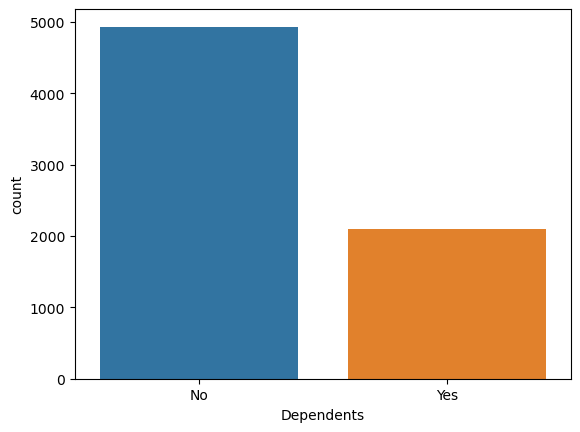

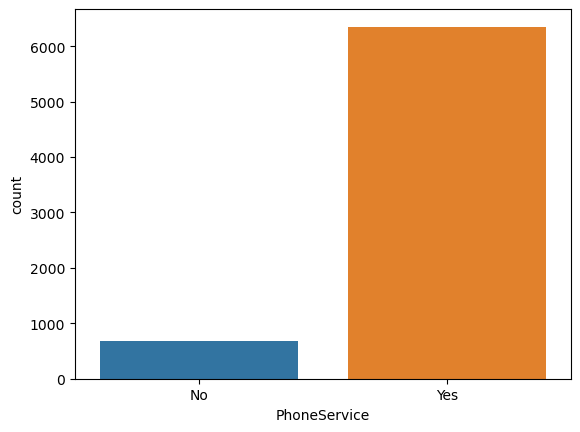

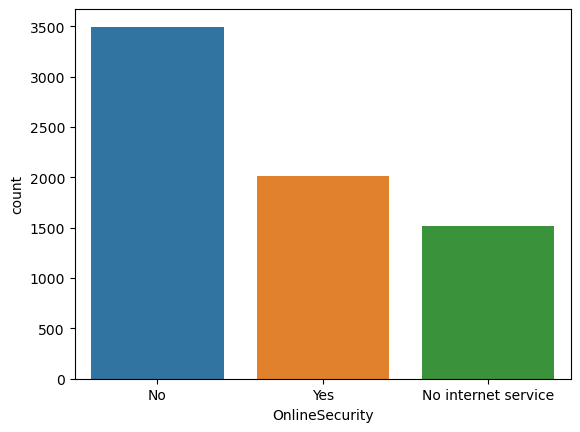

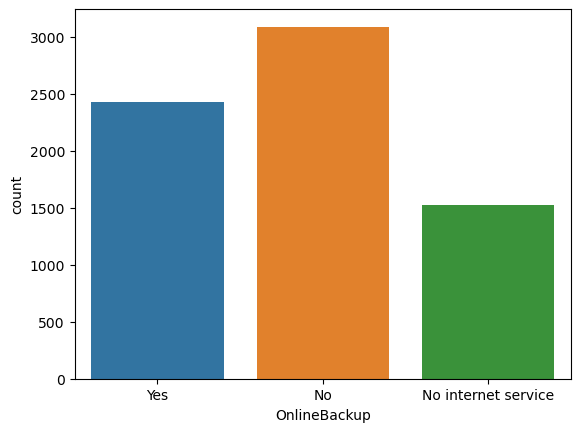

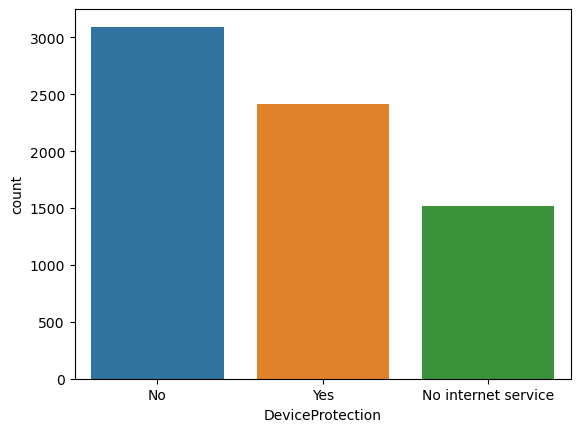

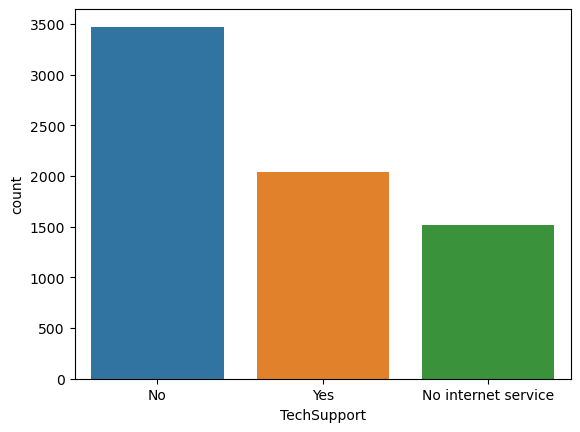

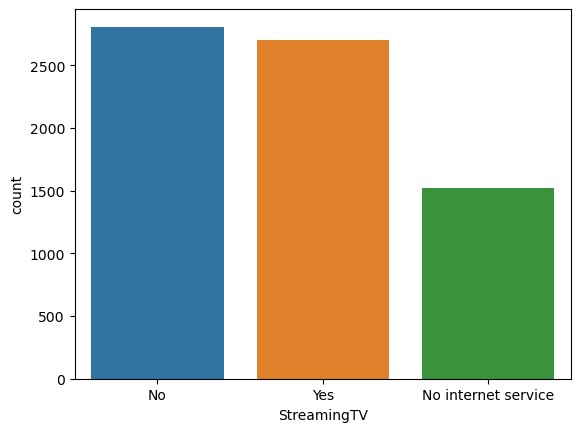

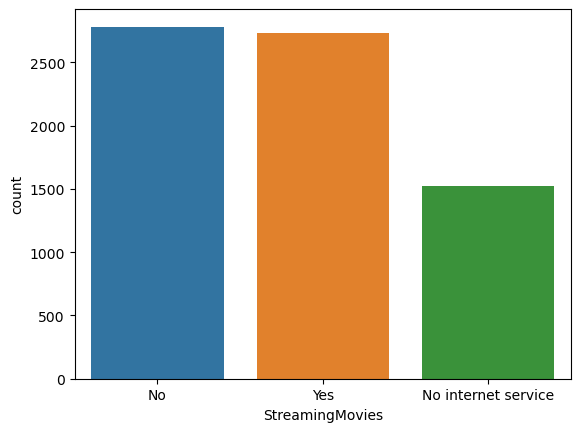

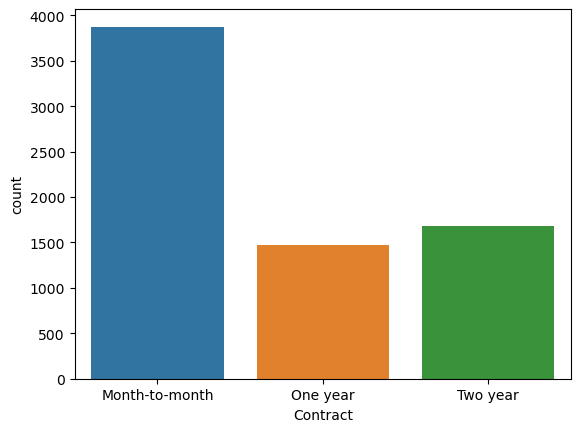

In [10]:
for col in X.select_dtypes(object).columns:
    sns.countplot(X[col])
    plt.show()

In [11]:
# Binomial columns

binomial_cols = ['Partner', 'Dependents', 'PhoneService']

for col in binomial_cols:
    X[col] = X[col].apply(lambda x: 1 if x == "Yes" else 0)
    
# Rest of categorical columns

X = pd.get_dummies(X)
X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,gender_Female,gender_Male,OnlineSecurity_No,...,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,1,0,1,0,29.85,29.85,1,0,1,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,34,1,56.95,1889.50,0,1,0,...,0,1,0,0,1,0,0,0,1,0
2,0,0,0,2,1,53.85,108.15,0,1,0,...,0,1,0,0,1,0,0,1,0,0
3,0,0,0,45,0,42.30,1840.75,0,1,0,...,1,1,0,0,1,0,0,0,1,0
4,0,0,0,2,1,70.70,151.65,1,0,1,...,0,1,0,0,1,0,0,1,0,0


### 1. Apply SMOTE for upsampling the data

In [12]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

Churn
No       5163
Yes      5163
dtype: int64

- **Use logistic regression to fit the model and compute the accuracy of the model.**

In [13]:
model = LogisticRegression()
run_model(model, X_sm, y_sm)

              precision    recall  f1-score   support

          No       0.82      0.82      0.82      1531
         Yes       0.83      0.83      0.83      1567

    accuracy                           0.83      3098
   macro avg       0.83      0.83      0.83      3098
weighted avg       0.83      0.83      0.83      3098

The Kappa of your model is: 0.65


- **Use decision tree classifier to fit the model and compute the accuracy of the model.**

In [14]:
model = DecisionTreeClassifier()
run_model(model, X_sm, y_sm)

              precision    recall  f1-score   support

          No       0.80      0.79      0.79      1531
         Yes       0.80      0.80      0.80      1567

    accuracy                           0.80      3098
   macro avg       0.80      0.80      0.80      3098
weighted avg       0.80      0.80      0.80      3098

The Kappa of your model is: 0.59


In [15]:
model.get_depth()

29

In [16]:
model = DecisionTreeClassifier(criterion="entropy", random_state=30)
run_model(model, X_sm, y_sm)

              precision    recall  f1-score   support

          No       0.81      0.81      0.81      1531
         Yes       0.81      0.81      0.81      1567

    accuracy                           0.81      3098
   macro avg       0.81      0.81      0.81      3098
weighted avg       0.81      0.81      0.81      3098

The Kappa of your model is: 0.62


In [17]:
model.get_depth()

31

In [18]:
model = DecisionTreeClassifier(max_depth=20, random_state=30)
run_model(model, X_sm, y_sm)

              precision    recall  f1-score   support

          No       0.80      0.79      0.80      1531
         Yes       0.80      0.80      0.80      1567

    accuracy                           0.80      3098
   macro avg       0.80      0.80      0.80      3098
weighted avg       0.80      0.80      0.80      3098

The Kappa of your model is: 0.60


- **Compare the accuracies of the two models.**

Better results with logistic regression.

### 2. Apply TomekLinks for downsampling
- **It is important to remember that it does not make the two classes equal but only removes the points from the majority class that are close to other points in minority class.**

In [19]:
tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = tl.fit_resample(X, y)
y_tl.value_counts()

Churn
No       4597
Yes      1869
dtype: int64

- **Use logistic regression to fit the model and compute the accuracy of the model.**

In [20]:
model = LogisticRegression()
run_model(model, X_tl, y_tl)

              precision    recall  f1-score   support

          No       0.84      0.88      0.86      1352
         Yes       0.69      0.62      0.65       588

    accuracy                           0.80      1940
   macro avg       0.76      0.75      0.75      1940
weighted avg       0.79      0.80      0.80      1940

The Kappa of your model is: 0.51


- **Use decision tree classifier to fit the model and compute the accuracy of the model.**

In [21]:
model = DecisionTreeClassifier()
run_model(model, X_tl, y_tl)

              precision    recall  f1-score   support

          No       0.81      0.82      0.81      1352
         Yes       0.57      0.57      0.57       588

    accuracy                           0.74      1940
   macro avg       0.69      0.69      0.69      1940
weighted avg       0.74      0.74      0.74      1940

The Kappa of your model is: 0.39


In [22]:
model.get_depth()

30

In [23]:
model = DecisionTreeClassifier(random_state=30)
run_model(model, X_tl, y_tl)

              precision    recall  f1-score   support

          No       0.81      0.81      0.81      1352
         Yes       0.57      0.56      0.56       588

    accuracy                           0.74      1940
   macro avg       0.69      0.69      0.69      1940
weighted avg       0.74      0.74      0.74      1940

The Kappa of your model is: 0.37


In [24]:
model = DecisionTreeClassifier(criterion="entropy", random_state=30)
run_model(model, X_tl, y_tl)

              precision    recall  f1-score   support

          No       0.80      0.81      0.81      1352
         Yes       0.55      0.55      0.55       588

    accuracy                           0.73      1940
   macro avg       0.68      0.68      0.68      1940
weighted avg       0.73      0.73      0.73      1940

The Kappa of your model is: 0.36


In [25]:
model = DecisionTreeClassifier(max_depth=20, random_state=30)
run_model(model, X_tl, y_tl)

              precision    recall  f1-score   support

          No       0.80      0.82      0.81      1352
         Yes       0.57      0.54      0.55       588

    accuracy                           0.74      1940
   macro avg       0.69      0.68      0.68      1940
weighted avg       0.73      0.74      0.73      1940

The Kappa of your model is: 0.37


- **Compare the accuracies of the two models.**

As previously, better results with logistic regression.

- **You can also apply this algorithm one more time and check how the imbalance in the two classes changed from the last time.**

In [27]:
X_tl2, y_tl2 = tl.fit_resample(X_tl, y_tl)
y_tl2.value_counts()

Churn
No       4432
Yes      1869
dtype: int64

The imbalance is slightly smaller. Initially we had 26% of "Yes". After applying TomekLinks once, this percentage went up to 29%. Then, after applying TomekLinks a second time, the "Yes" class has gone up to 30%. But these improvements are very small. <br>
In the previous lab the best results were obtained with a combination of Tomek Links and SMOTE.

**Combination of Tomek Links and SMOTE** 

In [34]:
# 1. Tomeklinks on the majority (already done)
# 2. Upsample minority with SMOTE

X_tl_sm, y_tl_sm = smote.fit_resample(X_tl, y_tl)
y_tl_sm.value_counts()

Churn
No       4597
Yes      4597
dtype: int64

In [35]:
model = LogisticRegression()
run_model(model, X_tl_sm, y_tl_sm)

              precision    recall  f1-score   support

          No       0.82      0.82      0.82      1363
         Yes       0.83      0.83      0.83      1396

    accuracy                           0.82      2759
   macro avg       0.82      0.82      0.82      2759
weighted avg       0.82      0.82      0.82      2759

The Kappa of your model is: 0.65


The results with LR were better using only SMOTE.

In [36]:
model = DecisionTreeClassifier()
run_model(model, X_tl_sm, y_tl_sm)

              precision    recall  f1-score   support

          No       0.82      0.78      0.80      1363
         Yes       0.80      0.83      0.82      1396

    accuracy                           0.81      2759
   macro avg       0.81      0.81      0.81      2759
weighted avg       0.81      0.81      0.81      2759

The Kappa of your model is: 0.62


However, the use of TL and SMOTE has improved the Decision Tree model (although it is still worse than LR).

In [37]:
# 3. Apply Tomeklinks one more time to remove borderline cases

X_tl_sm_tl, y_tl_sm_tl = tl.fit_resample(X_tl_sm, y_tl_sm)
y_tl_sm_tl.value_counts()

Churn
Yes      4597
No       4362
dtype: int64

In [38]:
model = LogisticRegression()
run_model(model, X_tl_sm_tl, y_tl_sm_tl)

              precision    recall  f1-score   support

          No       0.82      0.80      0.81      1300
         Yes       0.82      0.84      0.83      1388

    accuracy                           0.82      2688
   macro avg       0.82      0.82      0.82      2688
weighted avg       0.82      0.82      0.82      2688

The Kappa of your model is: 0.64


In [39]:
model = DecisionTreeClassifier()
run_model(model, X_tl_sm_tl, y_tl_sm_tl)

              precision    recall  f1-score   support

          No       0.78      0.79      0.79      1300
         Yes       0.80      0.79      0.80      1388

    accuracy                           0.79      2688
   macro avg       0.79      0.79      0.79      2688
weighted avg       0.79      0.79      0.79      2688

The Kappa of your model is: 0.58


Not really good

### Conclusion
We have tried different methods to reduce imbalance (upsampling the minority with SMOTE, undersampling the majority with Tomek Links and a combination of both) and different models for classification (Logistic Regression and Decision Trees Classifier). <br>
The best results were obtained using **SMOTE** and **Logistic Regression**. 

In [41]:
model = LogisticRegression()
run_model(model, X_sm, y_sm)

              precision    recall  f1-score   support

          No       0.82      0.82      0.82      1531
         Yes       0.83      0.83      0.83      1567

    accuracy                           0.83      3098
   macro avg       0.83      0.83      0.83      3098
weighted avg       0.83      0.83      0.83      3098

The Kappa of your model is: 0.65


Looking at the precision, recall and F1-score for both classes, "No" and "Yes", they are all around 0.82-0.83. This indicates that the model has a balanced performance for both classes. <br>
Regarding the "Yes" class (customers that have churned), precision and recall are both 0.83. This means that when the model predicts "Yes", it is correct about 83% of the time, and it can identify 83% of the actual "Yes" customers.<br>
The accuracy of the model is 0.83, which indicates that it correctly classifies 83% of the cases overall. <br>
Lastly, the kappa coefficient of 0.65 suggests a substantial level of agreement beyond chance between the model and the actual observations. <br>
Overall, these results indicate that the logistic regression model is performing well with balanced precision, recall, and F1-scores for both classes. The accuracy and kappa coefficient further support the model's effectiveness in capturing patterns and making accurate predictions.